<a href="https://colab.research.google.com/github/PatienceMutede/Real-Estate-Price-Prediction/blob/main/Real_Estate_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing packages

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
from math import sqrt


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
%matplotlib inline

In [ ]:
data="/content/drive/MyDrive/Machine Learning/msc_training_dataset.csv"

In [ ]:
df=pd.read_csv(data)

In [ ]:
global df

Cleaning Data (Checking for missing values)
Our data shows that we have total 12 colunms and 3000 rows and they are no missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


Descriptive Analysis

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
room,3000.0,2.990000,1.424281,1.0,2.0,3.0,4.0,5.0
bathroom,3000.0,1.489000,0.499962,1.0,1.0,1.0,2.0,2.0
kitchen,3000.0,1.522000,0.499599,1.0,1.0,2.0,2.0,2.0
french_door,3000.0,1.998333,0.813153,1.0,1.0,2.0,3.0,3.0
backyard,3000.0,0.490333,0.499990,0.0,0.0,0.0,1.0,1.0
furnished,3000.0,0.488667,0.499955,0.0,0.0,0.0,1.0,1.0
green_paint,3000.0,0.485000,0.499858,0.0,0.0,0.0,1.0,1.0
solar_power,3000.0,0.495667,0.500065,0.0,0.0,0.0,1.0,1.0
woodfloor,3000.0,0.512333,0.499931,0.0,0.0,1.0,1.0,1.0
qlm_security,3000.0,0.480667,0.499709,0.0,0.0,0.0,1.0,1.0


array([[<Axes: title={'center': 'room'}>,
        <Axes: title={'center': 'bathroom'}>,
        <Axes: title={'center': 'kitchen'}>],
       [<Axes: title={'center': 'french_door'}>,
        <Axes: title={'center': 'backyard'}>,
        <Axes: title={'center': 'furnished'}>],
       [<Axes: title={'center': 'green_paint'}>,
        <Axes: title={'center': 'solar_power'}>,
        <Axes: title={'center': 'woodfloor'}>],
       [<Axes: title={'center': 'qlm_security'}>,
        <Axes: title={'center': 'club_access'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

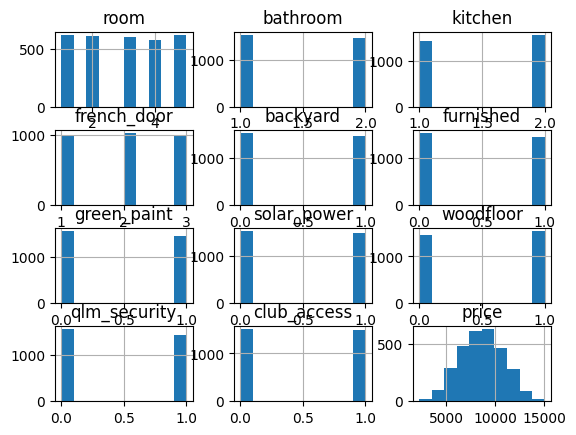

In [ ]:
df.hist()

<Axes: >

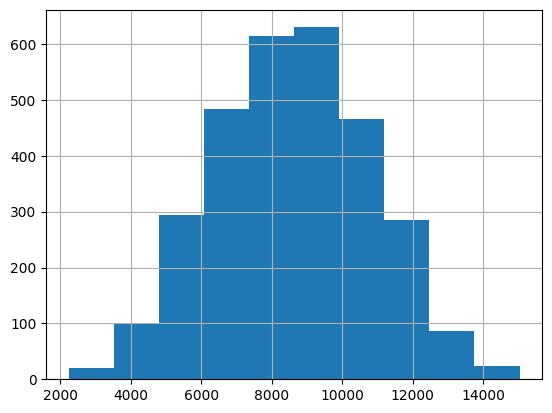

In [ ]:
df.price.hist()

<Axes: ylabel='Density'>

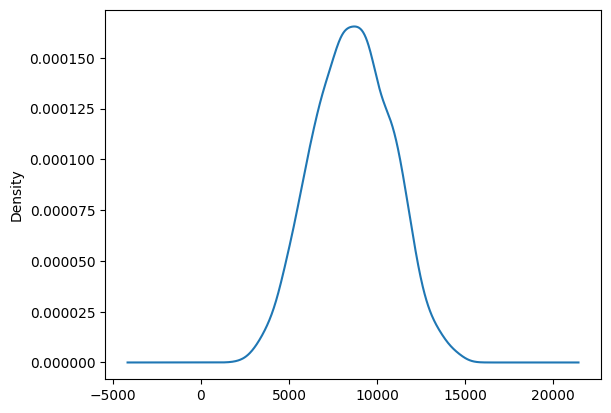

In [ ]:
df.price.plot.kde()

In [ ]:
print("Skewness: %f" % df.price.skew())
print("Kurtosis: %f" % df.price.kurt())

Skewness: 0.004485
Kurtosis: -0.415660


In [ ]:
df.corr()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.000000,0.015766,0.021865,0.010350,0.001269,0.004055,-0.015667,-0.006147,0.013754,-0.024165,0.001400,0.649354
bathroom,0.015766,1.000000,-0.014383,0.011027,0.011580,-0.010504,0.035364,-0.022864,0.001877,-0.024208,-0.028021,0.062724
kitchen,0.021865,-0.014383,1.000000,-0.021661,-0.001151,0.002334,-0.023380,0.003718,-0.009764,0.023074,0.003366,0.122804
french_door,0.010350,0.011027,-0.021661,1.000000,0.009392,-0.010299,0.010193,-0.014368,0.017686,-0.025928,-0.015171,0.087913
backyard,0.001269,0.011580,-0.001151,0.009392,1.000000,-0.002439,0.002088,-0.005502,0.011149,-0.012092,-0.022684,0.125625
furnished,0.004055,-0.010504,0.002334,-0.010299,-0.002439,1.000000,0.032009,-0.019536,0.007897,-0.014224,0.016656,0.452742
green_paint,-0.015667,0.035364,-0.023380,0.010193,0.002088,0.032009,1.000000,-0.008264,-0.011268,-0.005834,-0.018695,0.077428
solar_power,-0.006147,-0.022864,0.003718,-0.014368,-0.005502,-0.019536,-0.008264,1.000000,-0.019793,-0.003671,-0.013340,0.317680
woodfloor,0.013754,0.001877,-0.009764,0.017686,0.011149,0.007897,-0.011268,-0.019793,1.000000,0.004292,0.006685,0.434485
qlm_security,-0.024165,-0.024208,0.023074,-0.025928,-0.012092,-0.014224,-0.005834,-0.003671,0.004292,1.000000,0.028662,0.079210


<Axes: >

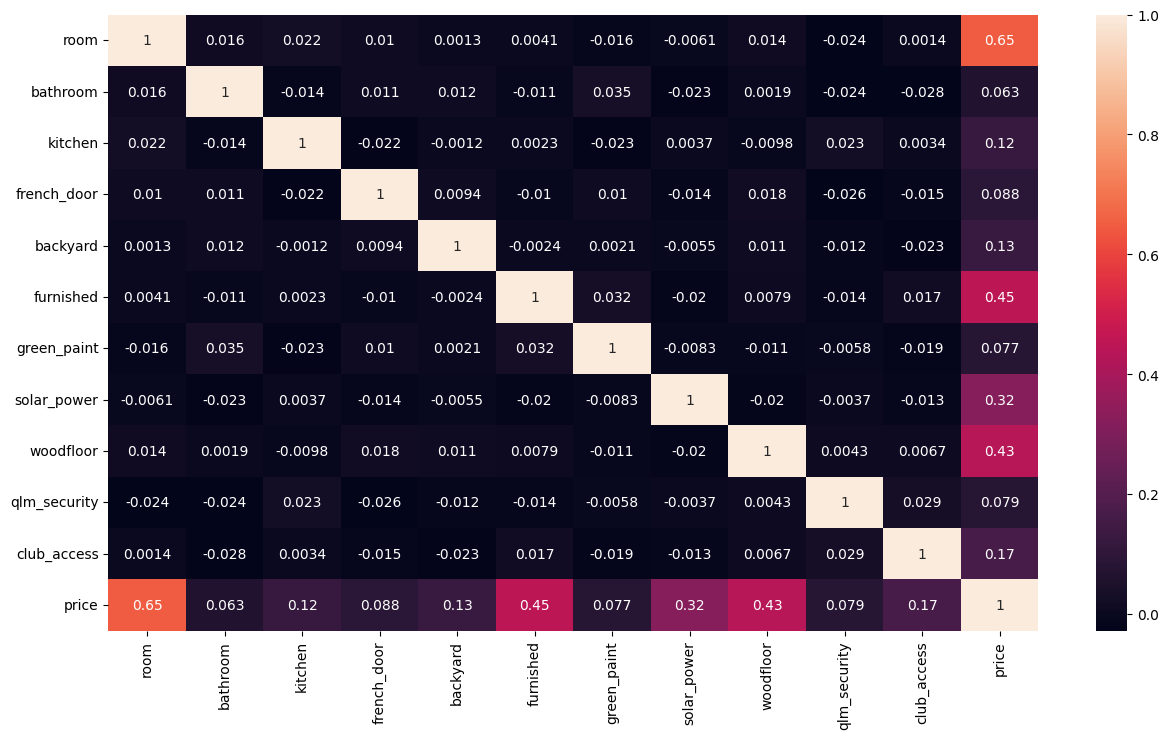

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)


Showing Correlation between Price and the other variables

In [ ]:
data=df.corr()

In [ ]:
data["price"]

room            0.649354
bathroom        0.062724
kitchen         0.122804
french_door     0.087913
backyard        0.125625
furnished       0.452742
green_paint     0.077428
solar_power     0.317680
woodfloor       0.434485
qlm_security    0.079210
club_access     0.166944
price           1.000000
Name: price, dtype: float64

In [ ]:
x_train,y_train =df.drop(['price'],axis=1),df['price']
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
reg.score(x_train,y_train)

1.0

In [ ]:
reg.coef_

array([1000.,  300.,  500.,  240.,  560., 2000.,  370., 1530., 1890.,
        440.,  730.])

In [ ]:
print("Intercept: \n",reg.intercept_)

Intercept: 
 195.00000000000182


In [ ]:
pd.DataFrame(reg.coef_, x_train.columns, columns=['Coefficients'])

,Coefficients
room,1000.0
bathroom,300.0
kitchen,500.0
french_door,240.0
backyard,560.0
furnished,2000.0
green_paint,370.0
solar_power,1530.0
woodfloor,1890.0
qlm_security,440.0


In [ ]:
df=pd.DataFrame({'feature_names':x_train.columns,'Coefficients':reg.coef_})

In [ ]:
df

,feature_names,Coefficients
0,room,1000.0
1,bathroom,300.0
2,kitchen,500.0
3,french_door,240.0
4,backyard,560.0
5,furnished,2000.0
6,green_paint,370.0
7,solar_power,1530.0
8,woodfloor,1890.0
9,qlm_security,440.0


In [ ]:
importance= reg.coef_

In [ ]:
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 1000.00000
Feature: 1, Score: 300.00000
Feature: 2, Score: 500.00000
Feature: 3, Score: 240.00000
Feature: 4, Score: 560.00000
Feature: 5, Score: 2000.00000
Feature: 6, Score: 370.00000
Feature: 7, Score: 1530.00000
Feature: 8, Score: 1890.00000
Feature: 9, Score: 440.00000
Feature: 10, Score: 730.00000


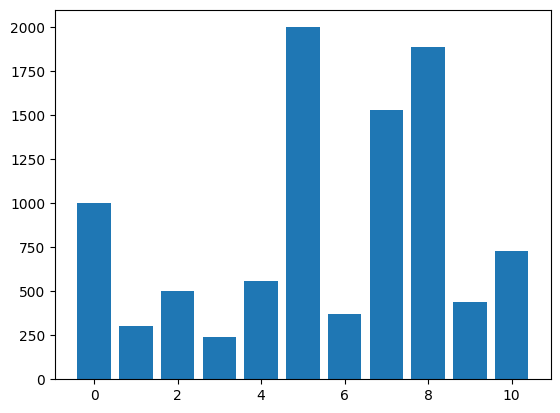

In [ ]:
pyplot.bar([x_train for x_train in range(len(importance))], importance)
pyplot.show()


Importing Test Dataset


In [ ]:
path="/content/drive/MyDrive/Machine Learning/msc_testing_dataset.csv"

In [ ]:
test=pd.read_csv(path)

In [ ]:
test

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178
...,...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0,10088
995,5,1,2,3,1,1,0,0,0,0,0,9788
996,3,2,2,1,0,1,1,1,0,1,0,9388
997,3,2,1,1,1,0,0,1,1,0,0,8528


Assigning X test and Y test variables

In [ ]:
x_test,y_test =test.drop(['price'],axis=1),test['price']


In [ ]:
x_test

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,1,1,1,3,0,0,1,1,0,1,0
1,5,1,1,2,0,0,0,0,0,1,1
2,5,1,1,3,0,0,0,1,1,1,1
3,4,2,2,1,0,1,1,0,0,1,0
4,5,2,1,1,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
994,5,2,2,3,1,1,0,0,0,0,0
995,5,1,2,3,1,1,0,0,0,0,0
996,3,2,2,1,0,1,1,1,0,1,0
997,3,2,1,1,1,0,0,1,1,0,0


Predicting Y(Prices) variables using the Multiple Linear Regression

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
y_pred

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [ ]:
reg.score(x_test,y_test)

0.9999656095212318

In [ ]:
y_pred

array([ 5068.,  7658., 11318.,  8858., 11178., 11388., 11748.,  6848.,
        7828.,  5908.,  9108.,  8308.,  6708., 11318.,  7218.,  9178.,
        8788., 12758.,  9758.,  6668.,  9338.,  7798.,  7088.,  4328.,
        9978.,  6868.,  7348.,  8908.,  6338.,  9708.,  6658., 10318.,
       10498.,  8208.,  7578., 10368.,  9488., 11128.,  9778., 12838.,
        6308.,  5138.,  9838.,  8908., 11728.,  6218.,  4108., 11488.,
        9578.,  5548., 11468., 10408.,  4138.,  7748., 13068.,  9608.,
        6458.,  8378., 10168.,  7848.,  8288., 14318.,  7088.,  8448.,
       12638.,  7108., 11448., 10568., 10108.,  5548.,  8248., 12108.,
        4228.,  5878.,  9368.,  9258.,  7078., 11638., 10868., 10838.,
        8798.,  7368., 11878.,  8328., 11818.,  5958.,  8788.,  8288.,
        7178.,  8258.,  7588., 11938., 11978.,  7988.,  6658., 10808.,
       11248.,  8208.,  9368.,  7458.,  7248.,  8948.,  4588.,  9688.,
        5748.,  5088., 10658.,  9718.,  8618., 12528.,  8178.,  6118.,
      

In [ ]:
y_pred=

AttributeError: ignored

In [ ]:
print("Intercept: \n",reg.intercept_)
print("Coefficients: \n",reg.coef_)

Intercept: 
 208.00000000000364
Coefficients: 
 [1000.  300.  500.  240.  560. 2000.  370. 1530. 1890.  440.  730.]


In [ ]:
print('R-squared: {:.3f}'.format(r2_score(y_test, y_pred)))
print('MSE: {:.3f}'.format(mean_squared_error(y_test, y_pred)))
print('RMSE: {:.3f}'.format(sqrt(mean_squared_error(y_test, y_pred))))
print('MAE: {:.3f}'.format(mean_absolute_error(y_test, y_pred)))

R-squared: 1.000
MSE: 0.000
RMSE: 0.000
MAE: 0.000


In [ ]:
sns.scatterplot(y_test,y_pred)

TypeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
forest.score(x_test,y_test)

0.9963487222315036